In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
df = pd.read_csv('C:\\Users\\Navneet\\Documents\\Machine Learning Nov\\Datasets\\house_pricing.csv')


In [24]:
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [25]:
df.isnull().sum()

City          0
Type          0
Beds          0
Baths         0
SquareFeet    0
Price         0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    object 
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 38.3+ KB


Feature Extraction
- numerical Columns => scatter plot, correlation(pearson coefficient)
- categorical columns => boxplot, ANOVA 

<AxesSubplot: xlabel='Beds', ylabel='Price'>

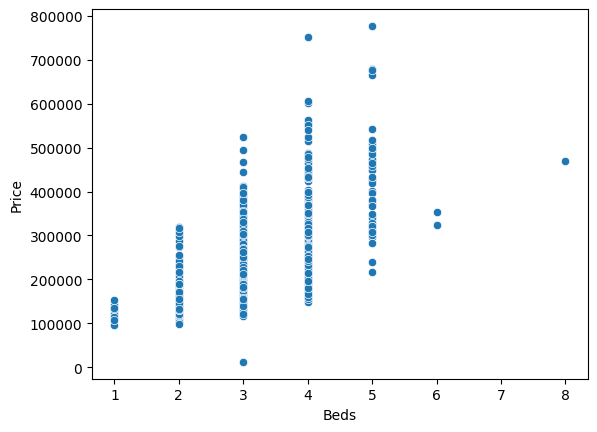

In [27]:
sns.scatterplot(x='Beds', y = 'Price', data = df)

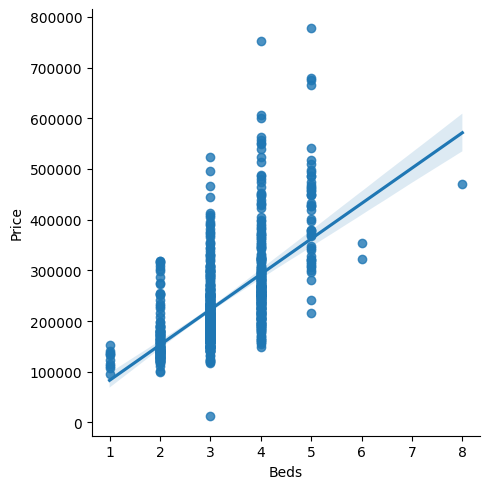

In [28]:
sns.lmplot(x='Beds', y = 'Price', data = df)

In [29]:
df.corr()

C:\Users\Navneet\AppData\Local\Temp\ipykernel_3924\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Beds,Baths,SquareFeet,Price
Beds,1.000000,0.654746,0.695710,0.609677
Baths,0.654746,1.000000,0.724631,0.632218
SquareFeet,0.695710,0.724631,1.000000,0.851755
Price,0.609677,0.632218,0.851755,1.000000


C:\Users\Navneet\AppData\Local\Temp\ipykernel_3924\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

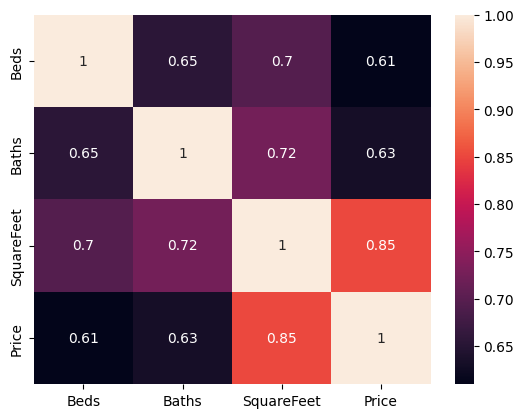

In [30]:
sns.heatmap(df.corr(), annot = True)

From the above graph we know that price is directly propotional to the squarefeet, 

<AxesSubplot: xlabel='Baths', ylabel='Price'>

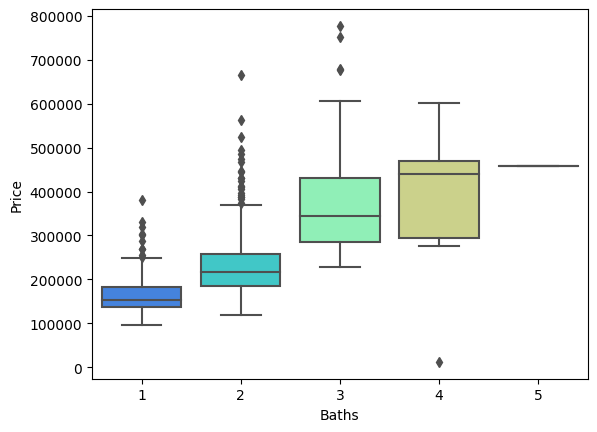

In [31]:
sns.boxplot(x = 'Baths', y= 'Price', data = df, palette = 'rainbow')

<AxesSubplot: xlabel='Beds', ylabel='Price'>

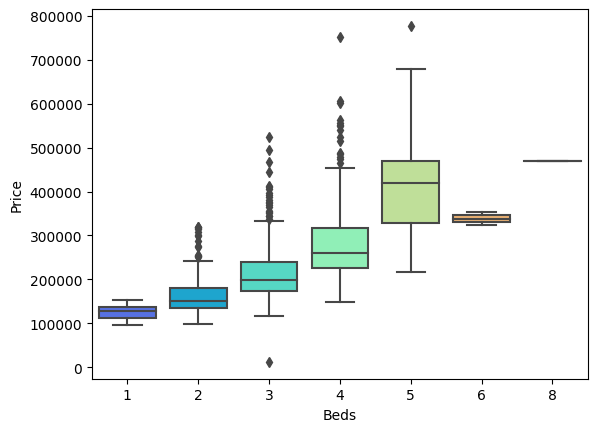

In [32]:
sns.boxplot(x='Beds', y='Price', data=df, palette='rainbow')


<AxesSubplot: xlabel='SquareFeet', ylabel='Price'>

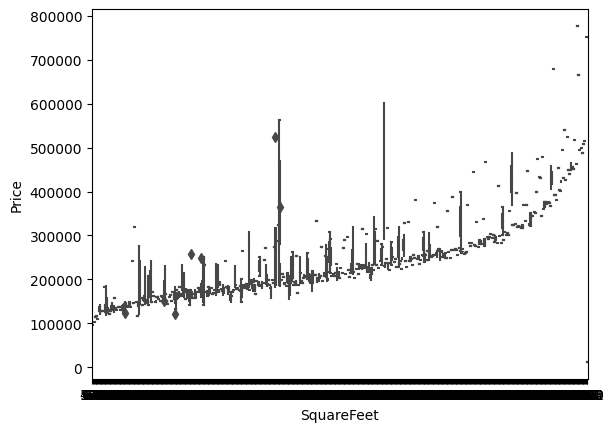

In [33]:
sns.boxplot(x='SquareFeet', y='Price', data=df, palette='rainbow')


<AxesSubplot: xlabel='Type', ylabel='Price'>

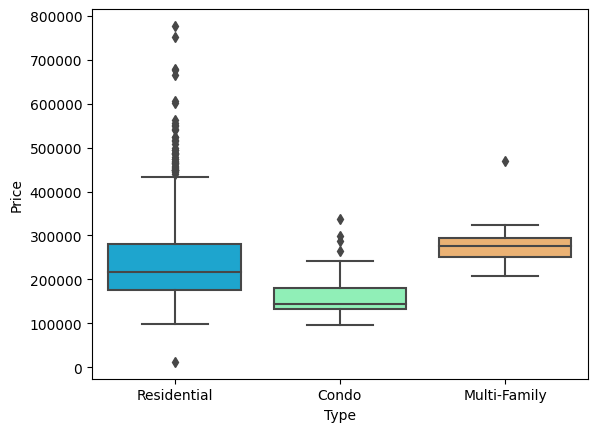

In [34]:
sns.boxplot(x='Type', y='Price', data=df, palette='rainbow')

<function matplotlib.pyplot.show(close=None, block=None)>

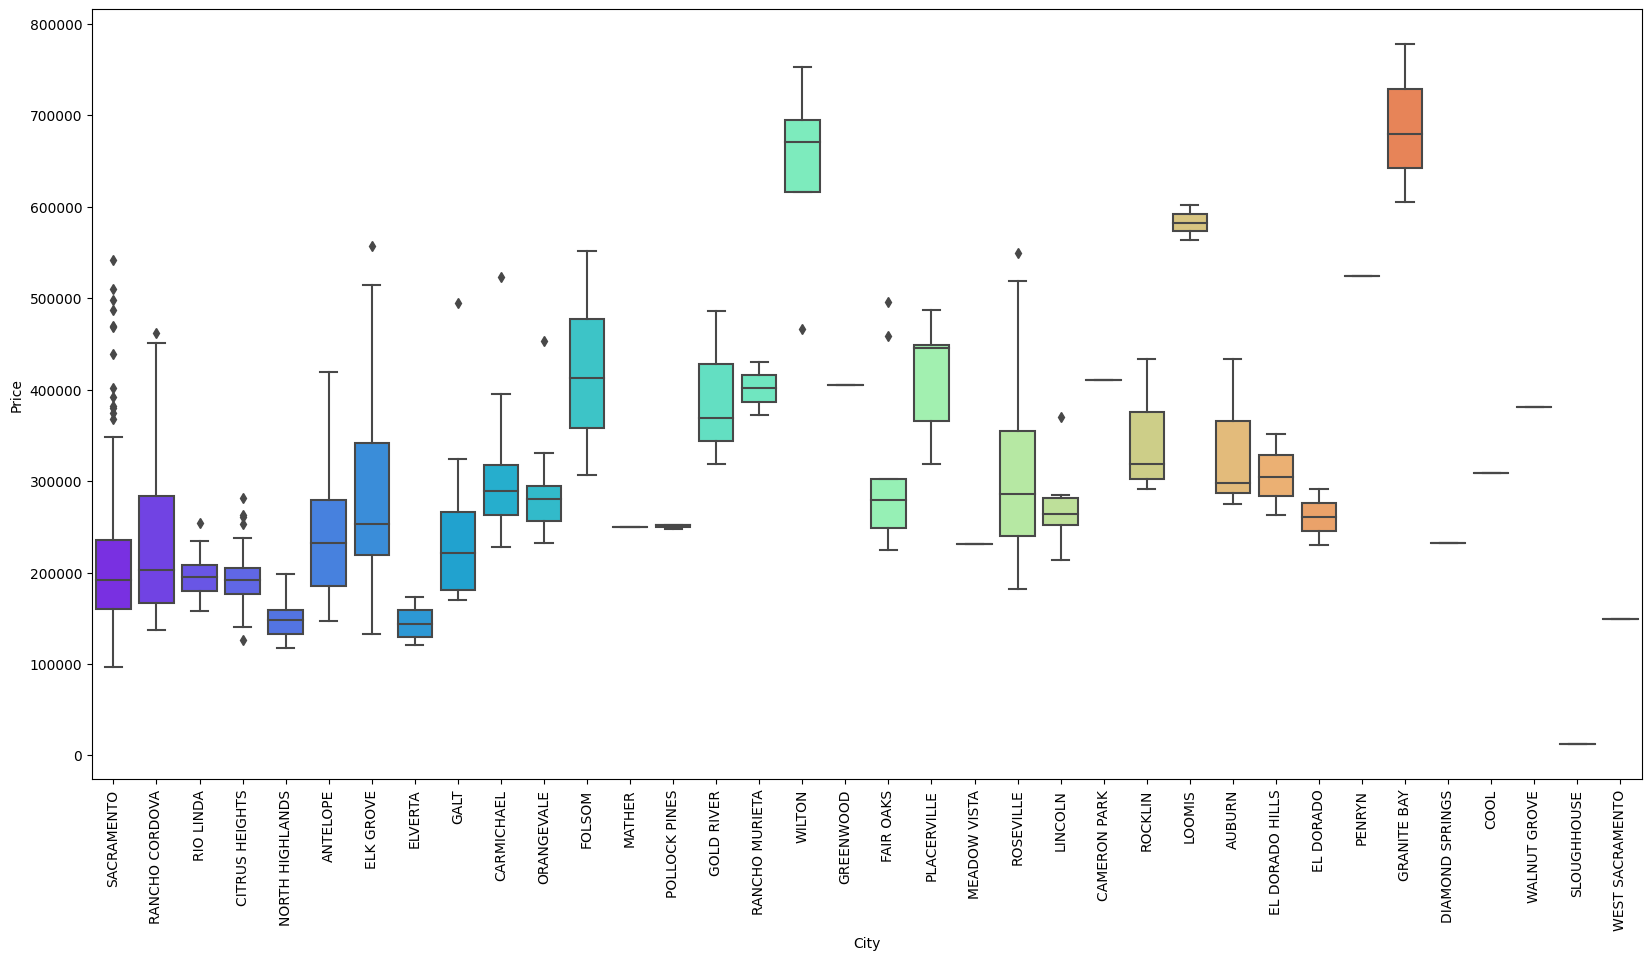

In [35]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x='City', y='Price', data=df, palette='rainbow')
plt.xticks(rotation = 90)
plt.show

In [36]:
X = df[['Beds', 'Baths', 'SquareFeet']] #vector
y = df['Price'] #scalar 

In [37]:
model = Pipeline(steps = [
    ('scaler', StandardScaler()), 
    ('regression', LinearRegression())
])

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((651, 3), (163, 3), (651,), (163,))

In [39]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [40]:
print("Training Score: ", model.score(xtrain, ytrain)*100)
print("Testing Score: ", model.score(xtrain, ytrain)*100)

Training Score:  72.58389960562268
Testing Score:  72.58389960562268


In [41]:
ypred = model.predict(xtest)
print('MSE: ', mean_squared_error(ytest, ypred))
print('MAE: ', mean_absolute_error(ytest, ypred))

MSE:  2288818666.353279
MAE:  25111.073482661985


In [42]:
from joblib import dump
dump(model, 'house_price.joblib')

['house_price.joblib']